# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 5. Анализ вакансий.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`.  **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` и полученные данные (подробности далее). 
* Если вы выполняете <b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">сложную часть</font></a></b>, то кроме `ipynb` прислать нужно также ноутбук, сконвертированный **в формате `html`**, который можно получить как `File -> Download as -> HTML`. **Внимательно проверьте, что plotly-графики в ней сохранились**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


**Баллы за задание:**

<b><a href="#Легкая-часть" style="text-decoration: none;"><font color="blue">Легкая часть</font></a></b> (достаточно на "хор"):
* Задача 1 &mdash; 80 баллов

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (необходимо на "отл"):
* Задача 2 &mdash; 60 баллов

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

import requests
from time import sleep
import json
from tqdm import tqdm

In [154]:
import plotly
import plotly.express as px


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны. 

В данном задании вам нужно проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>.

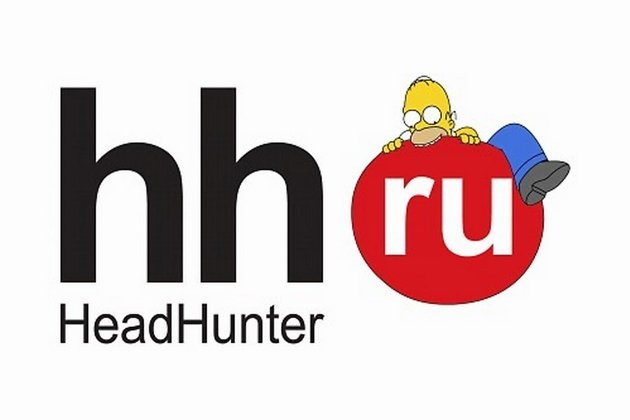

 ---
### Справка по работе с API.   

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер HeadHunter. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [133]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': 'Аналитик Данных',
    'area': 1,
    'page': 0,
    'per_page': 10
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

In [134]:
data

{'items': [{'id': '53987927',
   'premium': False,
   'name': 'Аналитик в инфобизнес',
   'department': None,
   'has_test': False,
   'response_letter_required': False,
   'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
   'salary': {'from': 100000, 'to': None, 'currency': 'RUR', 'gross': True},
   'type': {'id': 'open', 'name': 'Открытая'},
   'address': None,
   'response_url': None,
   'sort_point_distance': None,
   'published_at': '2022-03-17T12:42:15+0300',
   'created_at': '2022-03-17T12:42:15+0300',
   'archived': False,
   'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=53987927',
   'insider_interview': None,
   'url': 'https://api.hh.ru/vacancies/53987927?host=hh.ru',
   'alternate_url': 'https://hh.ru/vacancy/53987927',
   'relations': [],
   'employer': {'id': '4653383',
    'name': 'Хохлова Инна Валериевна',
    'url': 'https://api.hh.ru/employers/4653383',
    'alternate_url': 'https://hh.ru/employer/4653383',
    'l

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [135]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

Можем посмотреть на краткое описание первой вакансии

In [136]:
data['items'][0]

{'id': '53987927',
 'premium': False,
 'name': 'Аналитик в инфобизнес',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 100000, 'to': None, 'currency': 'RUR', 'gross': True},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2022-03-17T12:42:15+0300',
 'created_at': '2022-03-17T12:42:15+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=53987927',
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/53987927?host=hh.ru',
 'alternate_url': 'https://hh.ru/vacancy/53987927',
 'relations': [],
 'employer': {'id': '4653383',
  'name': 'Хохлова Инна Валериевна',
  'url': 'https://api.hh.ru/employers/4653383',
  'alternate_url': 'https://hh.ru/employer/4653383',
  'logo_urls': None,
  'vacancies_url': 'https://api.hh.ru/vaca

Сколько всего найдено вакансий

In [137]:
data['found']

6310

Количество страниц в результатах поиска

In [138]:
data['pages']

200

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [139]:
df = pd.json_normalize(data['items'])
df.columns

Index(['id', 'premium', 'name', 'department', 'has_test',
       'response_letter_required', 'address', 'response_url',
       'sort_point_distance', 'published_at', 'created_at', 'archived',
       'apply_alternate_url', 'insider_interview', 'url', 'alternate_url',
       'relations', 'contacts', 'working_days', 'working_time_intervals',
       'working_time_modes', 'accept_temporary', 'area.id', 'area.name',
       'area.url', 'salary.from', 'salary.to', 'salary.currency',
       'salary.gross', 'type.id', 'type.name', 'employer.id', 'employer.name',
       'employer.url', 'employer.alternate_url', 'employer.logo_urls',
       'employer.vacancies_url', 'employer.trusted', 'snippet.requirement',
       'snippet.responsibility', 'schedule.id', 'schedule.name', 'salary',
       'department.id', 'department.name', 'employer.logo_urls.original',
       'employer.logo_urls.90', 'employer.logo_urls.240', 'address.city',
       'address.street', 'address.building', 'address.description',
   

Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [30]:
vacancy = df['id'].iloc[0]
vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())

In [31]:
vacancy_info

{'id': '49423067',
 'premium': False,
 'billing_type': {'id': 'standard_plus', 'name': 'Стандарт плюс'},
 'relations': [],
 'name': 'Data Scientist',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': None, 'to': 320000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'allow_messages': True,
 'site': {'id': 'hh', 'name': 'hh.ru'},
 'experience': {'id': 'between3And6', 'name': 'От 3 до 6 лет'},
 'schedule': {'id': 'fullDay', 'name': 'Полный день'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': None,
 'contacts': None,
 'description': '<p>Ищем специалиста по Data Science, чтобы строить и улучшать модели машинного обучения, которые помогут усовершенствовать наш продукт и внутренние процессы. Мы стремимся к тому, чтобы мы стали быстрее и удобнее для клиентов. И в этом нам нужна твоя помощь.</p> <p><stron

In [32]:
vacancy_info = pd.json_normalize(vacancy_info)

In [40]:
vacancy_info

,id,premium,relations,name,insider_interview,response_letter_required,address,allow_messages,department,contacts,...,employment.name,employer.id,employer.name,employer.url,employer.alternate_url,employer.logo_urls.240,employer.logo_urls.90,employer.logo_urls.original,employer.vacancies_url,employer.trusted
0,49423067,False,[],Data Scientist,None,False,None,True,None,None,...,Полная занятость,2324020,Точка,https://api.hh.ru/employers/2324020,https://hh.ru/employer/2324020,https://hhcdn.ru/employer-logo/3414734.jpeg,https://hhcdn.ru/employer-logo/3414733.jpeg,https://hhcdn.ru/employer-logo-original/743443...,https://api.hh.ru/vacancies?employer_id=2324020,True


### <font color="blue"><i>Легкая часть</i></font>

 ---
### Задача 1.   

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например `аналитик данных`.

In [88]:
URL = 'https://api.hh.ru/vacancies'
professions = ['Data Scientist' + 'OR' + 'Аналитик Данных', 'Data Analyst' + 'OR' + 'Data Engineer']
all_jobs = pd.DataFrame([])

for i in tqdm(range(2)):
    index = 0
    current_job = professions[i]
    while True:
        params = {
            'text': current_job,
            'area': 1,
            'page': index,
            'per_page': 100
        }
        req = requests.get(URL, params)
        data = json.loads(req.content.decode())
        if (not 'items' in data.keys()):
            break
        if (len(data['items']) == 0):
            break
        index += 1
        data = pd.json_normalize(data['items'])
        all_jobs = pd.concat([data, all_jobs], ignore_index=True)
        sleep(1)

100%|█████████████████████████████████████████████| 2/2 [01:39<00:00, 49.75s/it]


In [140]:
all_jobs

,id,premium,name,department,has_test,response_letter_required,salary,address,response_url,sort_point_distance,...,address.metro.lat,address.metro.lng,address.metro_stations,address.id,department.id,department.name,address.metro,employer.logo_urls,insider_interview.id,insider_interview.url
0,49944308,False,Senior Product Manager,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52395313,False,Lead Python Developer,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53019415,False,Product Owner,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,52899252,False,Backend C# developer,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,47096177,False,Java Developer (продуктовые решения для для ба...,NaN,False,False,NaN,NaN,None,None,...,55.720278,37.563056,"[{'station_name': 'Лужники', 'line_name': 'МЦК...",1651801,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3620,53987237,False,Финансовый аналитик,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3621,50404035,False,Контролер-аналитик,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3622,53001419,False,Аналитик данных,NaN,False,False,NaN,NaN,None,None,...,55.779584,37.633646,"[{'station_name': 'Проспект Мира', 'line_name'...",3300406,NaN,NaN,NaN,NaN,NaN,NaN
3623,51091610,False,Бизнес-аналитик,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,[],512566,NaN,NaN,NaN,NaN,NaN,NaN


В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

In [90]:
all_jobs.drop_duplicates(subset=['id'], ignore_index=True, inplace=True)
all_jobs

,id,premium,name,department,has_test,response_letter_required,salary,address,response_url,sort_point_distance,...,address.metro.lat,address.metro.lng,address.metro_stations,address.id,department.id,department.name,address.metro,employer.logo_urls,insider_interview.id,insider_interview.url
0,49944308,False,Senior Product Manager,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52395313,False,Lead Python Developer,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53019415,False,Product Owner,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,52899252,False,Backend C# developer,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,47096177,False,Java Developer (продуктовые решения для для ба...,NaN,False,False,NaN,NaN,None,None,...,55.720278,37.563056,"[{'station_name': 'Лужники', 'line_name': 'МЦК...",1651801,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3620,53987237,False,Финансовый аналитик,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3621,50404035,False,Контролер-аналитик,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3622,53001419,False,Аналитик данных,NaN,False,False,NaN,NaN,None,None,...,55.779584,37.633646,"[{'station_name': 'Проспект Мира', 'line_name'...",3300406,NaN,NaN,NaN,NaN,NaN,NaN
3623,51091610,False,Бизнес-аналитик,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,[],512566,NaN,NaN,NaN,NaN,NaN,NaN


Загрузите подробное описание каждой вакансии и создайте удобную таблицу данных.

In [91]:
columns = ['id', 'name', 'key_skills', 'schedule.name', 'description', 'salary.from', 'salary.to', 'salary.currency', 'salary.gross', 'experience.name']
all_vacancy = pd.DataFrame(columns=columns)
for i in tqdm(range(all_jobs.shape[0])):
    vacancy = all_jobs['id'].iloc[i]
    vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'
    
    req = requests.get(vacancy_url)
    vacancy_info = json.loads(req.content.decode())
    df = pd.json_normalize(vacancy_info)
    if 'salary' in df.columns:
        df[['salary.from', 'salary.to', 'salary.currency', 'salary.gross']] = None
    
    all_vacancy = pd.concat([all_vacancy, df[columns]], ignore_index=True)
    sleep(0.5)

100%|█████████████████████████████████████| 3625/3625 [1:01:17<00:00,  1.01s/it]


Заменим пустые строки в 'key_skills' на None и запишем 'key_skills' в удобном виде.

In [92]:
all_vacancy['key_skills'] = all_vacancy['key_skills'].\
apply(lambda x: None if len(x) == 0 else [skill['name'] for skill in x])

all_vacancy[['lat', 'lng']] = all_jobs[['address.lat', 'address.lng']]
all_vacancy['employer.name'] = all_jobs['employer.name']

In [93]:
all_vacancy

,id,name,key_skills,schedule.name,description,salary.from,salary.to,salary.currency,salary.gross,experience.name,lat,lng,employer.name
0,49944308,Senior Product Manager,"[Английский язык, Product Management, Разработ...",Удаленная работа,<p><strong>Tiger.Trade</strong> - это продукто...,None,None,None,None,От 3 до 6 лет,NaN,NaN,Тайгер Трейд
1,52395313,Lead Python Developer,"[Python, Big Data]",Полный день,"<p>В компанию, которая занимается аналитикой ц...",300000,500000,RUR,False,От 3 до 6 лет,NaN,NaN,Дартс рекрутинг сервисез
2,53019415,Product Owner,None,Полный день,<p>​IPPON Technologies - IT компания с француз...,None,None,None,None,От 1 года до 3 лет,NaN,NaN,Ippon Technologies.
3,52899252,Backend C# developer,"[C#, .NET Framework, ASP.NET, SQL, API, Scrum]",Удаленная работа,<p><strong>About us:</strong></p> <p>Dzing is ...,None,None,None,None,От 3 до 6 лет,NaN,NaN,Dzing Finance
4,47096177,Java Developer (продуктовые решения для для ба...,"[Java, SQL, Git, Spring Boot, Maven, Spring Fr...",Удаленная работа,"<p><em><strong>«Платформа ОФД» - IT-компания, ...",None,None,None,None,От 1 года до 3 лет,55.723207,37.561113,Платформа ОФД
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3620,53987237,Финансовый аналитик,"[Анализ текущих финансовых показателей, Финанс...",Полный день,<p><strong>ВНИМАНИЕ! ВАКАНСИЯ В ГОРОДЕ ТАШКЕНТ...,None,None,None,None,От 1 года до 3 лет,NaN,NaN,Группа ERIELL
3621,50404035,Контролер-аналитик,"[SQL, MS PowerPoint, Power BI, Подготовка през...",Полный день,<strong>Обязанности:</strong> <ul> <li>Контрол...,None,None,None,None,От 1 года до 3 лет,NaN,NaN,Медиапоинт
3622,53001419,Аналитик данных,"[SQL, Python, Работа с базами данных, Tableau,...",Полный день,<p>RUTUBE - Крупнейший российский видеохостинг...,None,None,None,None,От 1 года до 3 лет,55.786004,37.639168,Rutube
3623,51091610,Бизнес-аналитик,None,Полный день,<p><em>ФКУ Налог-Сервис ФНС России - это продв...,None,None,None,None,От 1 года до 3 лет,55.835114,37.408194,Филиал ФКУ Налог-Сервис ФНС России по ЦОД в г....


**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

In [128]:
all_jobs.to_excel('all_jobs.xlsx')
all_vacancy.to_excel('all_vacancy.xlsx')

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [94]:
all_vacancy.shape[0]

3625

**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

In [95]:
all_skills = {}
for skill in all_vacancy['key_skills']:
    if (skill == None):
        continue
    for i in skill:
        if (i in all_skills):
            all_skills[i] += 1
        else:
            all_skills[i] = 1
all_skills = dict(sorted(all_skills.items(), key=lambda x: x[1], reverse=True))
skills_df = pd.DataFrame.from_dict(all_skills, orient='index').reset_index().rename(columns={'index': 'skill', 0: 'count'})

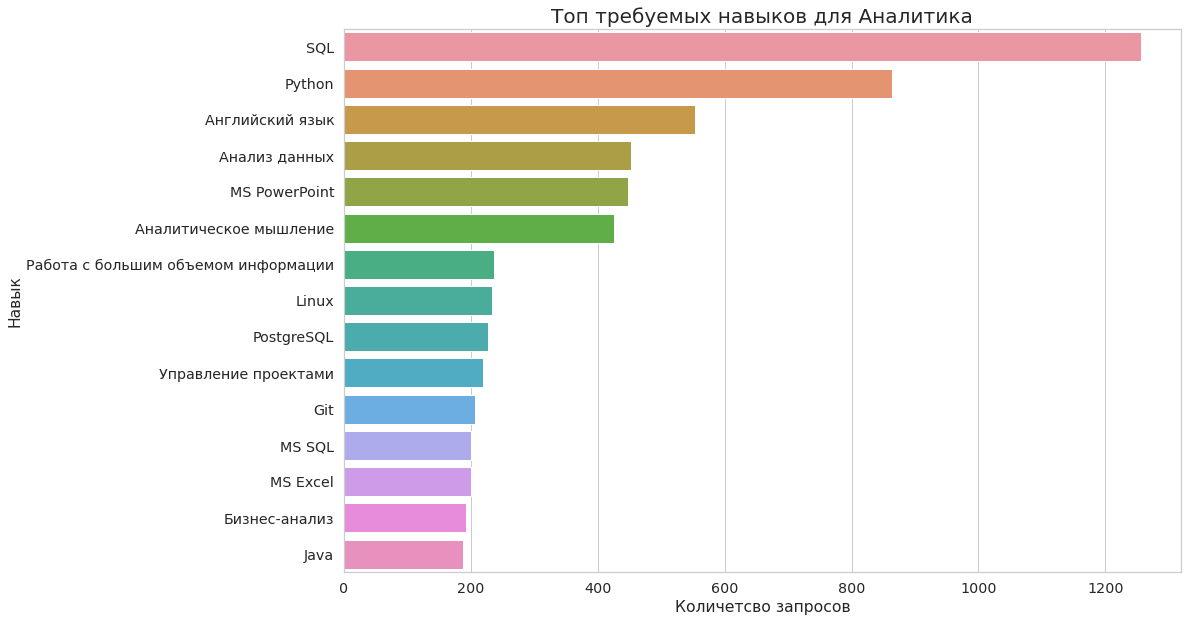

In [186]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(15, 10))
    sns.barplot(y="skill", x="count", data=skills_df.head(15))
    plt.xlabel('Количетсво запросов')
    plt.ylabel('Навык')
    plt.title('Топ требуемых навыков для Аналитика', fontsize=20);

Как и ожидалось, топ необходимых навыков для аналитика данных: SQL, Python, Английский язык, Анализ данных.

**Вопрос 3.** Какая средняя зарплата?

In [97]:
avg_salary = []
for i in range(all_vacancy.shape[0]):
    from_s = all_vacancy['salary.from'][i]
    to_s = all_vacancy['salary.to'][i]
    salary_current = 0
    if from_s != None and to_s != None:
        salary_current = (from_s + to_s) / 2
    elif from_s == None and to_s != None:
        salary_current = to_s
    elif from_s != None and to_s == None:
        salary_current = from_s
    else:
        avg_salary.append(None)
        continue
        
    if all_vacancy['salary.currency'][i] == 'USD':
        salary_current *= 98
    elif all_vacancy['salary.currency'][i] == 'EUR':
        salary_current *= 109
        
    if all_vacancy['salary.gross'][i]:
        salary_current *= 0.87
        
    avg_salary.append(salary_current)

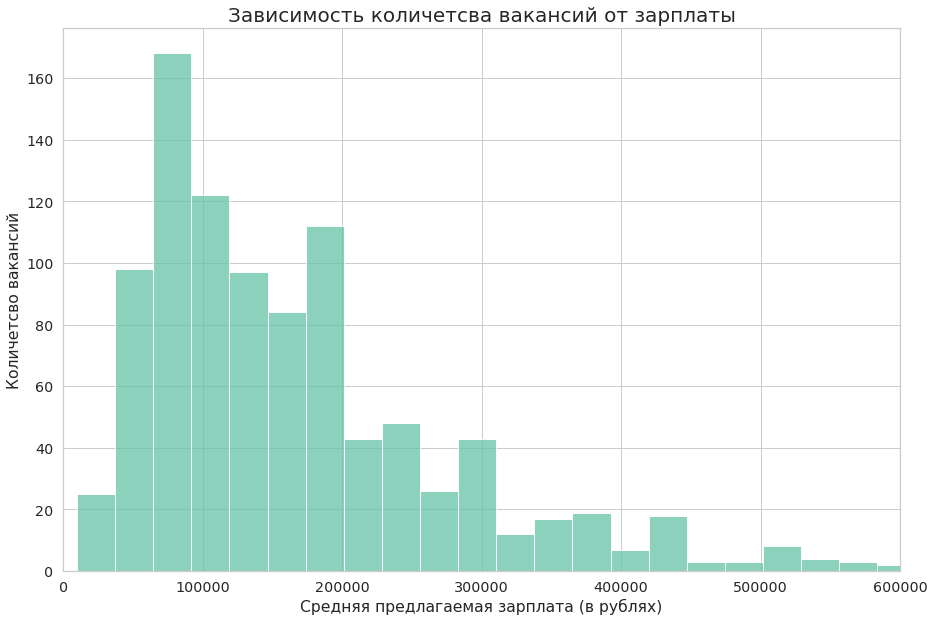

In [187]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(15, 10))
    sns.histplot(data=avg_salary)
    plt.xlim((0, 0.6 * 10**6))
    plt.xlabel('Средняя предлагаемая зарплата (в рублях)')
    plt.ylabel('Количетсво вакансий')
    plt.title('Зависимость количетсва вакансий от зарплаты', fontsize=20);

Видно, что наиболее часто предлагаемая зарплата для аналитика - в районе 100 тысяч рублей. Также многие работодатели готовы платить от 100 до 300 тысяч рублей.

##### Также проанализируем вакансии для разработчика.

In [100]:
URL = 'https://api.hh.ru/vacancies'
professions = ['Разработчик' + 'OR' + 'Программист', 'Developer' + 'OR' + 'Programmer']
all_jobs_new = pd.DataFrame([])

for i in tqdm(range(2)):
    index = 0
    current_job = professions[i]
    while True:
        params = {
            'text': current_job,
            'area': 1,
            'page': index,
            'per_page': 100
        }
        req = requests.get(URL, params)
        data = json.loads(req.content.decode())
        if (not 'items' in data.keys()):
            break
        if (len(data['items']) == 0):
            break
        index += 1
        data = pd.json_normalize(data['items'])
        all_jobs_new = pd.concat([data, all_jobs_new], ignore_index=True)
        sleep(0.5)

100%|█████████████████████████████████████████████| 2/2 [01:00<00:00, 30.37s/it]


In [101]:
all_jobs_new

,id,premium,name,department,has_test,response_letter_required,salary,address,response_url,sort_point_distance,...,address.metro.lat,address.metro.lng,address.metro_stations,address.id,employer.logo_urls,address.metro,department.id,department.name,insider_interview.id,insider_interview.url
0,53702096,False,Ведущий PHP разработчик,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53375543,False,Senior iOS Developer,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53375735,False,Senior Android Developer,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,53488591,False,IOS Developer (Swift),NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,53805333,False,Разработчик по машинному обучению / Machine Le...,NaN,False,False,NaN,NaN,None,None,...,55.729741,37.638693,"[{'station_name': 'Павелецкая', 'line_name': '...",5395243,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,54002416,False,Программист 1C,NaN,False,False,NaN,NaN,None,None,...,55.687147,37.572300,"[{'station_name': 'Академическая', 'line_name'...",40028,NaN,NaN,NaN,NaN,NaN,NaN
3996,53990530,False,Разработчик Oracle,NaN,False,False,NaN,NaN,None,None,...,55.757500,37.525556,"[{'station_name': 'Шелепиха', 'line_name': 'МЦ...",3581882,NaN,NaN,NaN,NaN,NaN,NaN
3997,53990440,False,Разработчик PostgreSQL,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3998,52847471,False,Middle Frontend Developer / Software Programmer,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
all_jobs_new.drop_duplicates(subset=['id'], ignore_index=True, inplace=True)
all_jobs_new

,id,premium,name,department,has_test,response_letter_required,salary,address,response_url,sort_point_distance,...,address.metro.lat,address.metro.lng,address.metro_stations,address.id,employer.logo_urls,address.metro,department.id,department.name,insider_interview.id,insider_interview.url
0,53702096,False,Ведущий PHP разработчик,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53375543,False,Senior iOS Developer,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53375735,False,Senior Android Developer,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,53488591,False,IOS Developer (Swift),NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,53805333,False,Разработчик по машинному обучению / Machine Le...,NaN,False,False,NaN,NaN,None,None,...,55.729741,37.638693,"[{'station_name': 'Павелецкая', 'line_name': '...",5395243,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,53693629,False,Программист Delphi,NaN,False,False,NaN,NaN,None,None,...,55.924459,37.527877,"[{'station_name': 'Новодачная', 'line_name': '...",3908779,NaN,NaN,NaN,NaN,NaN,NaN
2145,51955435,False,"Net разработчик (middle, senior)",NaN,False,False,NaN,NaN,None,None,...,55.729542,37.470973,"[{'station_name': 'Славянский бульвар', 'line_...",6997941,NaN,NaN,NaN,NaN,NaN,NaN
2146,53822369,False,Node.js разработчик,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2147,53822829,False,Программист SharePoint,NaN,False,False,NaN,NaN,None,None,...,55.662379,37.605274,"[{'station_name': 'Нахимовский проспект', 'lin...",2595211,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
columns = ['id', 'name', 'key_skills', 'schedule.name', 'description', 'salary.from', 'salary.to', 'salary.currency', 'salary.gross', 'experience.name']
all_vacancy_new = pd.DataFrame(columns=columns)
for i in tqdm(range(all_jobs_new.shape[0])):
    vacancy = all_jobs_new['id'].iloc[i]
    vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'
    
    req = requests.get(vacancy_url)
    vacancy_info = json.loads(req.content.decode())
    df = pd.json_normalize(vacancy_info)
    if 'salary' in df.columns:
        df[['salary.from', 'salary.to', 'salary.currency', 'salary.gross']] = None
    
    all_vacancy_new = pd.concat([all_vacancy_new, df[columns]], ignore_index=True)
    sleep(0.5)

100%|███████████████████████████████████████| 2149/2149 [36:50<00:00,  1.03s/it]


In [104]:
all_vacancy_new['key_skills'] = all_vacancy_new['key_skills'].\
apply(lambda x: None if len(x) == 0 else [skill['name'] for skill in x])

all_vacancy_new[['lat', 'lng']] = all_jobs_new[['address.lat', 'address.lng']]
all_vacancy_new['employer.name'] = all_jobs_new['employer.name']

In [105]:
all_vacancy_new

,id,name,key_skills,schedule.name,description,salary.from,salary.to,salary.currency,salary.gross,experience.name,lat,lng,employer.name
0,53702096,Ведущий PHP разработчик,"[PHP, ООП, jQuery, Laravel, SQL, JavaScript, G...",Полный день,<p><strong>Проект</strong>: Разработка/ дорабо...,None,None,None,None,От 3 до 6 лет,NaN,NaN,Bell Integrator
1,53375543,Senior iOS Developer,"[iOS, Design Patterns, iOS Human Interface Gui...",Удаленная работа,<p><em>Scalable Solutions – международная техн...,None,None,None,None,От 3 до 6 лет,NaN,NaN,Scalable Solutions
2,53375735,Senior Android Developer,"[Android SDK, Java, Android, Kotlin, Mvvm, Mat...",Удаленная работа,<p><em>Scalable Solutions – международная техн...,None,None,None,None,От 3 до 6 лет,NaN,NaN,Scalable Solutions
3,53488591,IOS Developer (Swift),"[Swift, Работа в команде, iOS, Atlassian Jira,...",Удаленная работа,<p>✅ Цель проекта - дать возможность пользоват...,None,None,None,None,От 3 до 6 лет,NaN,NaN,AppMaster.io
4,53805333,Разработчик по машинному обучению / Machine Le...,"[Git, Unity, C#, ML, Machine Learning, Нейросети]",Удаленная работа,<p>Мы - децентрализованная команда разработчик...,120000,250000,RUR,False,От 1 года до 3 лет,55.716798,37.644890,AEON
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,53693629,Программист Delphi,"[Delphi, FirebirdSQL]",Полный день,<p><strong>Обязанности:</strong></p> <ul> <li>...,None,None,None,None,От 3 до 6 лет,NaN,NaN,Фармстандарт
2145,51955435,"Net разработчик (middle, senior)","[Git, C#, JavaScript, ООП, .NET Framework]",Удаленная работа,"<p><strong>Net разработчик (middle, senior)</s...",None,None,None,None,От 3 до 6 лет,55.727166,37.469871,Ларионова Наталия Михайловна
2146,53822369,Node.js разработчик,"[Node.js, JavaScript]",Полный день,<p>Ищем<strong> Node.js разработчика </strong>...,None,None,None,None,От 1 года до 3 лет,NaN,NaN,Кузница Кадров
2147,53822829,Программист SharePoint,None,Полный день,<p><strong>Обязанности:</strong></p> <ul> <li>...,None,None,None,None,От 3 до 6 лет,55.664182,37.598663,"ЗЕНИТ, банк"


In [129]:
all_jobs_new.to_excel('all_jobs_new.xlsx')
all_vacancy_new.to_excel('all_vacancy_new.xlsx')

Сколько доступно вакансий?

In [130]:
all_vacancy_new.shape[0]

2149

Какие навыки требуются чаще всего?

In [106]:
all_skills = {}
for skill in all_vacancy_new['key_skills']:
    if (skill == None):
        continue
    for i in skill:
        if (i in all_skills):
            all_skills[i] += 1
        else:
            all_skills[i] = 1
all_skills = dict(sorted(all_skills.items(), key=lambda x: x[1], reverse=True))
skills_df_new = pd.DataFrame.from_dict(all_skills, orient='index').reset_index().rename(columns={'index': 'skill', 0: 'count'})

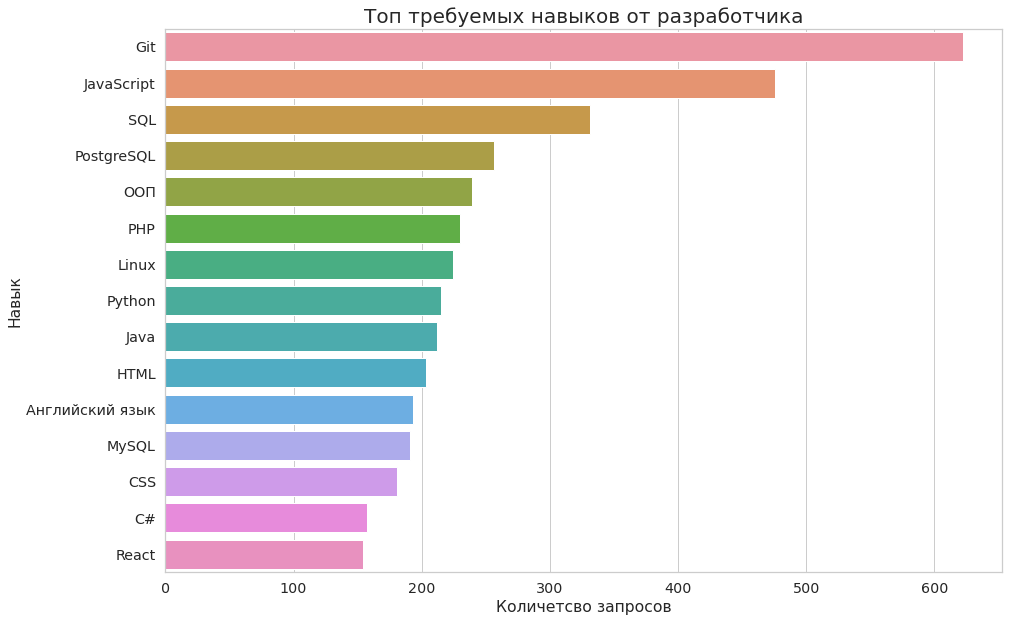

In [190]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(15, 10))
    sns.barplot(y="skill", x="count", data=skills_df_new.head(15))
    plt.xlabel('Количетсво запросов')
    plt.ylabel('Навык')
    plt.title('Топ требуемых навыков от разработчика', fontsize=20);

Как и ожидалось, наиболее требуемые навыки от разработчика: Git, JavaScript, SQL, ООП.

Какая средняя зарплата?

In [108]:
avg_salary_new = []
for i in range(all_vacancy_new.shape[0]):
    from_s = all_vacancy_new['salary.from'][i]
    to_s = all_vacancy_new['salary.to'][i]
    salary_current = 0
    if from_s != None and to_s != None:
        salary_current = (from_s + to_s) / 2
    elif from_s == None and to_s != None:
        salary_current = to_s
    elif from_s != None and to_s == None:
        salary_current = from_s
    else:
        avg_salary_new.append(None)
        continue
        
    if all_vacancy_new['salary.currency'][i] == 'USD':
        salary_current *= 98
    elif all_vacancy_new['salary.currency'][i] == 'EUR':
        salary_current *= 109
        
    if all_vacancy_new['salary.gross'][i]:
        salary_current *= 0.87
        
    avg_salary_new.append(salary_current)

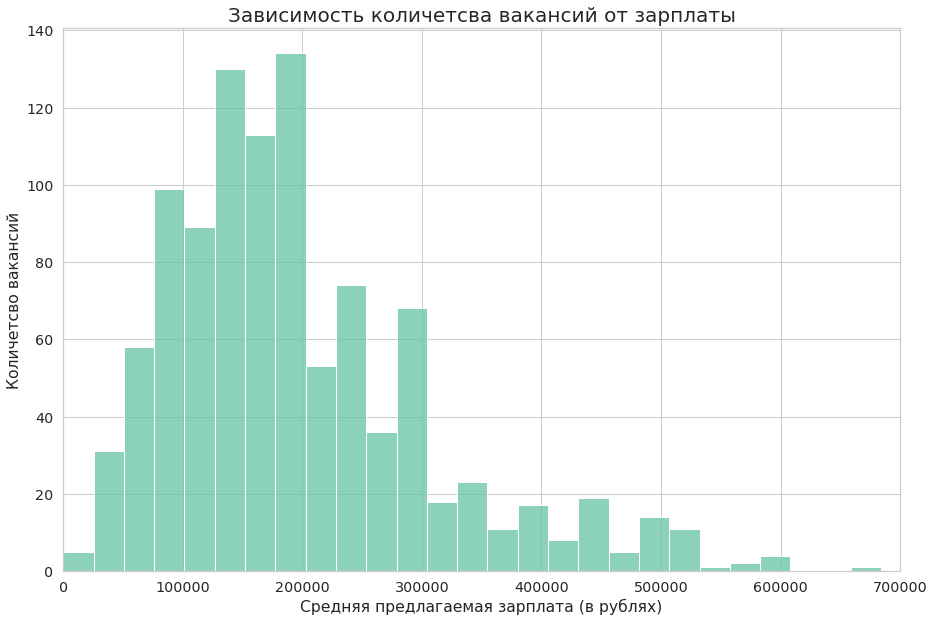

In [188]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(15, 10))
    sns.histplot(data=avg_salary_new)
    plt.xlim((0, 0.7 * 10**6))
    plt.xlabel('Средняя предлагаемая зарплата (в рублях)')
    plt.ylabel('Количетсво вакансий')
    plt.title('Зависимость количетсва вакансий от зарплаты', fontsize=20);

Наиболее часто предлагаемая зарплата для разрабочика - в районе 150 тысяч рублей. Также многие готовы платить до 300 тысяч рублей.

#### Выводы

Сравним данные для двух полученных запросов. Количество вакансий для аналитиков данных намного больше, чем для разработчиков. В среднем, разрабочикам платят больше, но не намного. Обе профессии достаточно востребованы, но также они требуют большое количетсво навыков, которым не всегда можно быстро научиться.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2.   

Для *одной* из рассмотренных ранее профессий ответьте на следующие вопросы:  
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе? 
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию, для этого используйте библиотеку plotly. В частности, постройте распределений вакансий на карте.

Для построения последних двух графиков вам могут понадобиться <a target="_blank" href="https://ru.wikipedia.org/wiki/Список_станций_Московского_метрополитена">внешние данные</a>.


Рассмотрим Аналитика данных.

In [117]:
min_exp = []
for text in all_vacancy['experience.name']:
    count = 0
    for i in text.split():
        if i.isdigit():
            count = int(i)
            break
    min_exp.append(count)

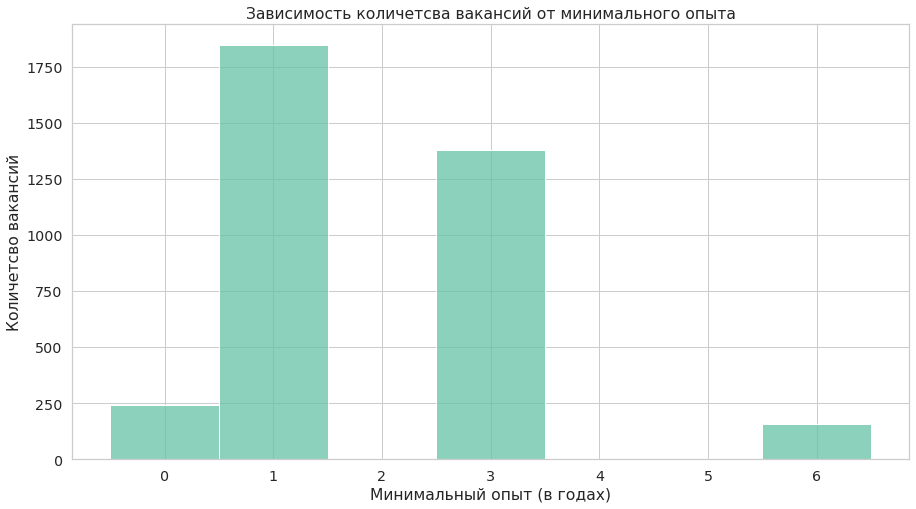

In [126]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(15, 8))
    sns.histplot(data=min_exp, discrete=True)
    plt.xlabel('Минимальный опыт (в годах)')
    plt.ylabel('Количетсво вакансий')
    plt.title('Зависимость количетсва вакансий от минимального опыта');

Видно, что чаще всего работодатели требуют наличие хотя бы одного года работы в сфере. Некоторые же хотят нанять только опытных сотрудников, работающих не менее 6 лет.

In [124]:
employers = {}
for i in all_vacancy['employer.name']:
    if i not in employers:
        employers[i] = 1
    else:
        employers[i] += 1
employers = dict(sorted(employers.items(), key=lambda x: x[1], reverse=True))
employers = pd.DataFrame.from_dict(employers, orient='index').reset_index().rename(columns={'index': 'employer', 0: 'count'})

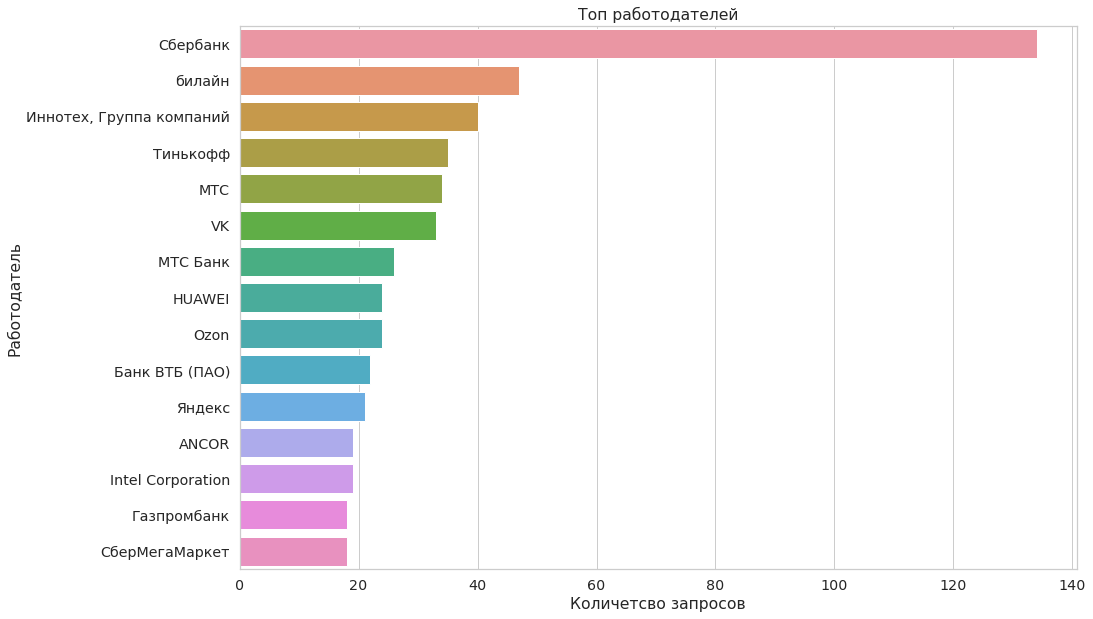

In [127]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(15, 10))
    sns.barplot(y="employer", x="count", data=employers.head(15))
    plt.xlabel('Количетсво запросов')
    plt.ylabel('Работодатель')
    plt.title('Топ работодателей');

Видно, что Сбербанк ищет очень много аналитиков, затем идут Билайн и Иннотех, но они не так сильно востребованы в них. Это может быть связано с тем, что Сбербанк работает над какой-то новой нишей и им нужно много новых сотрудников.

In [181]:
df_fig = all_jobs.copy()
df_fig.dropna(subset=['address.metro.line_name', 'address.metro.station_name', 'address.metro.lat',\
                      'address.metro.lng'], inplace=True)

In [194]:
fig = px.scatter_mapbox(
    df_fig,
    lat='address.metro.lat', lon='address.metro.lng',
    color = 'address.metro.line_name',
    zoom=10,
    size = df_fig['count'],
    size_max = 14,
    mapbox_style='carto-positron',
    center=dict(lat=55.7737, lon=37.5717),
)
fig.show();

Какие выводы можно сделать из построенных графиков?

Видно, что большинство компаний расположены не дальше МКАДА, но также они и не находятся в самом центре, так как им незачем там находиться и платить больую аренду.